In [6]:
# Import Libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [8]:
# Set Style
sns.set(style='whitegrid')

In [9]:
# Load and verify Data
df = pd.read_csv('../data/processed/insurance_data_cleaned.csv')
print("Dataset Columns:", df.columns.tolist())

C:\Users\Misirak\AppData\Local\Temp\ipykernel_32196\2874266735.py:2: DtypeWarning: Columns (37) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('../data/processed/insurance_data_cleaned.csv')


Dataset Columns: ['UnderwrittenCoverID', 'PolicyID', 'TransactionMonth', 'IsVATRegistered', 'Citizenship', 'LegalType', 'Title', 'Language', 'Bank', 'AccountType', 'MaritalStatus', 'Gender', 'Country', 'Province', 'PostalCode', 'MainCrestaZone', 'SubCrestaZone', 'ItemType', 'mmcode', 'VehicleType', 'RegistrationYear', 'make', 'Model', 'Cylinders', 'cubiccapacity', 'kilowatts', 'bodytype', 'NumberOfDoors', 'VehicleIntroDate', 'CustomValueEstimate', 'AlarmImmobiliser', 'TrackingDevice', 'CapitalOutstanding', 'NewVehicle', 'WrittenOff', 'Rebuilt', 'Converted', 'CrossBorder', 'NumberOfVehiclesInFleet', 'SumInsured', 'TermFrequency', 'CalculatedPremiumPerTerm', 'ExcessSelected', 'CoverCategory', 'CoverType', 'CoverGroup', 'Section', 'Product', 'StatutoryClass', 'StatutoryRiskType', 'TotalPremium', 'TotalClaims', 'VehicleAge', 'HasClaim', 'ClaimSeverity', 'Margin', 'LossRatio']


In [10]:
# Descriptive Statistics
num_columns = ['TotalPremium', 'TotalClaims', 'SumInsured']
print('Descriptive Statistics for Key Financial Variables:')
print(df[num_columns].describe())

Descriptive Statistics for Key Financial Variables:
        TotalPremium    TotalClaims    SumInsured
count  999910.000000  999910.000000  9.999100e+05
mean       61.541456      39.460172  6.041893e+05
std       191.626204    1195.663007  1.508277e+06
min      -782.576754  -12002.412281  1.000000e-02
25%         0.000000       0.000000  5.000000e+03
50%         2.178333       0.000000  7.500000e+03
75%        21.929825       0.000000  2.500000e+05
max     65282.603421   73613.201754  1.263620e+07


In [ ]:
# Data Quality Assessment
print('\nMissing Values:')
print(df.isnull().sum())


Missing Values:
UnderwrittenCoverID              0
PolicyID                         0
TransactionMonth                 0
IsVATRegistered                  0
Citizenship                      0
LegalType                        0
Title                            0
Language                         0
Bank                        145939
AccountType                  40223
MaritalStatus                 8256
Gender                           0
Country                          0
Province                         0
PostalCode                       0
MainCrestaZone                   0
SubCrestaZone                    0
ItemType                         0
mmcode                         548
VehicleType                      0
RegistrationYear                 0
make                           548
Model                          548
Cylinders                      548
cubiccapacity                  548
kilowatts                      548
bodytype                       548
NumberOfDoors                  548
Veh

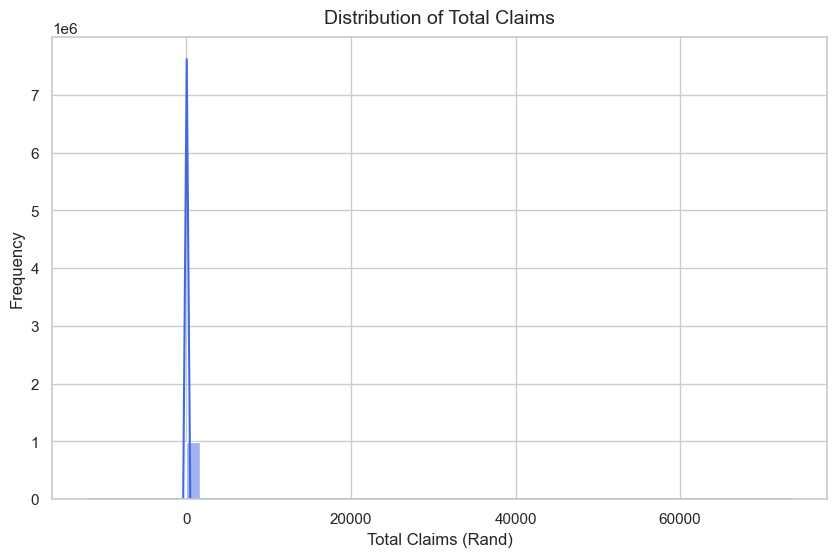

In [12]:
# Univariate Analysis - Distribution of Total Claims
plt.figure(figsize=(10, 6))
sns.histplot(df['TotalClaims'], bins=50, kde=True, color='royalblue')
plt.title('Distribution of Total Claims', fontsize=14, pad=10)
plt.xlabel('Total Claims (Rand)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.savefig('../plots/eda/total_claims_histogram.png', dpi=300, bbox_inches='tight')
plt.show()

C:\Users\Misirak\AppData\Local\Temp\ipykernel_32196\40654800.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Province', y='LossRatio', data=df, palette='Set2')


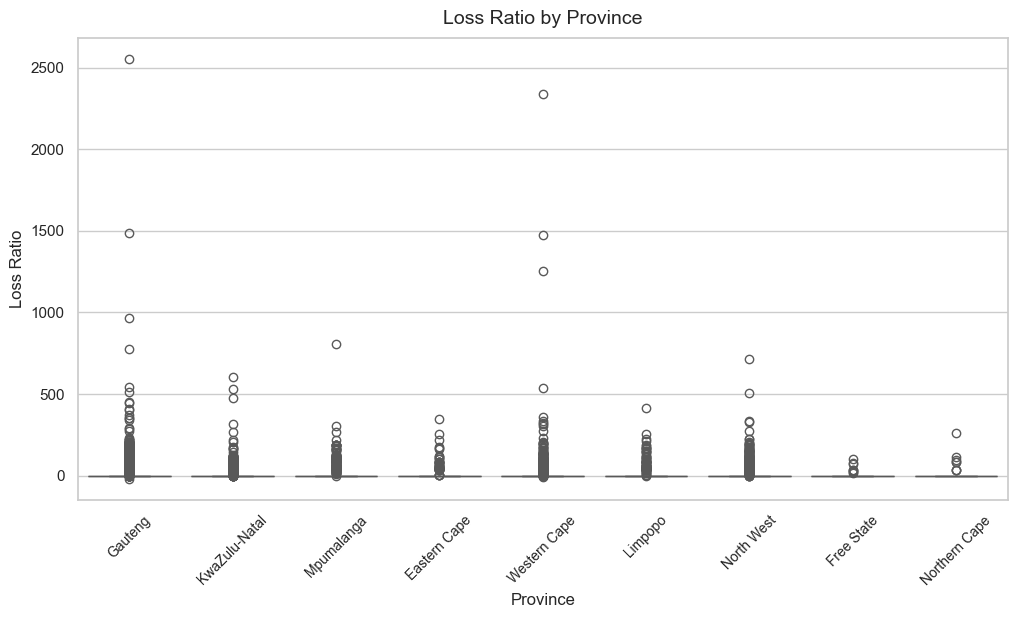

In [15]:
# Bivariate Analysis
df['LossRatio'] = df['TotalClaims'] / df['TotalPremium']
plt.figure(figsize=(12, 6))
sns.boxplot(x='Province', y='LossRatio', data=df, palette='Set2')
plt.title('Loss Ratio by Province', fontsize=14, pad=10)
plt.xticks(rotation=45, fontsize=10)
plt.xlabel('Province', fontsize=12)
plt.ylabel('Loss Ratio', fontsize=12)
plt.savefig('../plots/eda/loss_ratio_province.png', dpi=300, bbox_inches='tight')
plt.show()

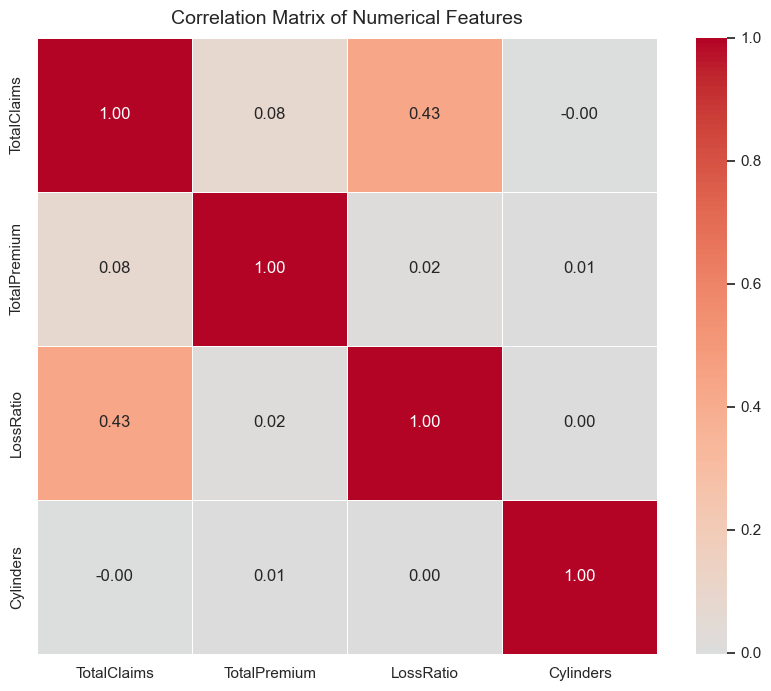

In [ ]:
# multivariate analysis - correlation matrix
df['LossRatio'] = df['TotalClaims'] / df['TotalPremium']
# Use only confirmed columns and check for 'Cylinders'
numerical_cols = ['TotalClaims', 'TotalPremium', 'LossRatio']
if 'Cylinders' in df.columns:
    numerical_cols.append('Cylinders')
correlation_matrix = df[numerical_cols].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix of Numerical Features', fontsize=14, pad=10)
plt.savefig('../plots/eda/correlation_matrix.png', dpi=300, bbox_inches='tight')
plt.show()
     